In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("SATILIK_EV1.xlsx")
df.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
X = df[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y = df['Fiyat']

In [5]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [6]:
enet = ElasticNet(random_state=42)
parametreler = {"alpha":[1e-15,1e-10,1e-8,1e-4,1e-2,1,2,3,4,5,10,20,30,50],
                'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}


In [7]:
enet_GS = GridSearchCV(enet, parametreler,scoring='r2',cv=5)

enet_GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 2, 3,
                                   4, 5, 10, 20, 30, 50],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2')

In [8]:
enet_GS.best_params_

{'alpha': 0.01, 'l1_ratio': 0.5}

In [9]:
enet_GS.best_estimator_

ElasticNet(alpha=0.01, random_state=42)

In [10]:
enet_GS.best_score_

0.7073610834707613

In [11]:
all_accuracies = cross_val_score(estimator = enet_GS.best_estimator_,X=x_train,y=y_train,cv=5)

In [12]:
all_accuracies

array([0.58966797, 0.86205089, 0.75871268, 0.59061914, 0.73575473])

In [15]:
enet_train_score = enet_GS.best_estimator_.score(x_train,y_train)
enet_test_score = enet_GS.best_estimator_.score(x_test,y_test)


In [16]:
enet_train_score

0.7333501064823666

In [17]:
enet_test_score

0.692310785896004

In [18]:
df['Predict'] = enet_GS.best_estimator_.predict(X)

In [19]:
df[['Fiyat','Predict']].head()

,Fiyat,Predict
0,475,437.210859
1,475,462.589482
2,450,446.916549
3,450,465.388095
4,475,454.152981


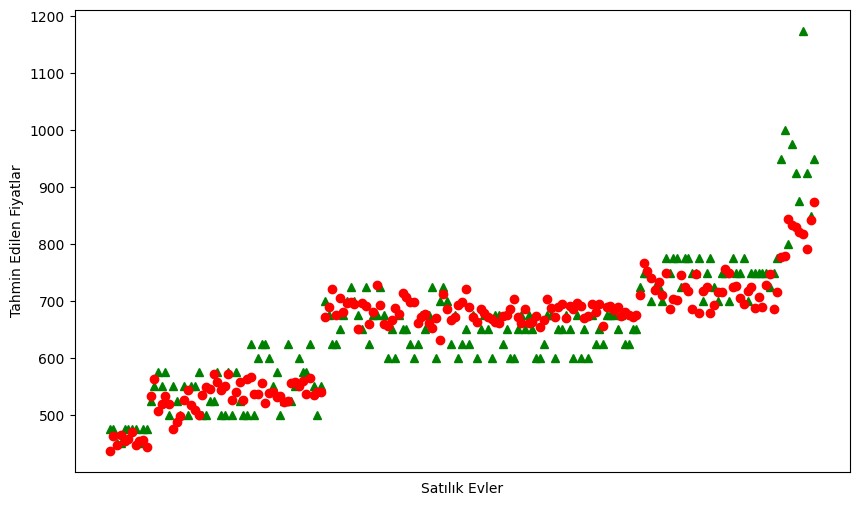

In [20]:
plt.figure(figsize=(10,6))
plt.xticks(df['Fiyat'],df.index.values)
plt.plot(df['Fiyat'],'g^')
plt.plot(df['Predict'],'ro')
plt.xlabel('Satılık Evler')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.show()